Problem statement : 
 
In this case study  we are going to use our own CNN binary image classifier which can classify the tomato images in to good tomatoes vs rotten tomatoes. 

Prerequisite 
1.Basic understanding of Neural Network and Convolutional Neural Network 
2.Python,Numpy,MatplotLib,Keras 
3.TensorFlow 2.0 
4.Windows/Mac OS/Linux 
5.Jupyter NoteBook. 
 
Dataset: 
•	Set of images of same size about 100 good images of tomatoes and 100 rotten tomatoes 
Approach:  
•	keras tensorflow develop a image classification program for this  in keras for the two class problem. 
•	classification result fall in one of the two classes i.e rotten tomato or good tomato by specifying the class mode as binary. 
 


In [1]:
# Convolutional Neural Network (odd tomatoes vs rotten tomatoes)

# Building the CNN

#Importing Libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
from keras import optimizers

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
#loading data

image_width=150
image_height=150

train_data_dir='Good_vs_Rotten/tomatoes_data/train'
validation_data_dir='Good_vs_Rotten/tomatoes_data/validation'
test_data_dir='Good_vs_Rotten/tomatoes_data/test'

train_sample=100
validation_sample=30
test_sample=10

epochs=50
batch_size=12
test_size=30



In [7]:
if K.image_data_format() == 'channels_first':
    input_shape= (3,image_width,image_height)
else :
    input_shape= (image_width,image_height,3)

In [4]:
# Data Augmentation

train_datagen= ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  rescale=1./255,
                                  horizontal_flip=True,
                                 fill_mode='nearest');

validation_datagen= ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
train_genarator= train_datagen.flow_from_directory(train_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode='binary')


validation_genarator= train_datagen.flow_from_directory(validation_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode='binary')


test_genarator= train_datagen.flow_from_directory(test_data_dir,target_size=(image_width,image_height),batch_size=test_size,class_mode='binary')

Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [9]:
#build model

# Initialising the CNN

model = Sequential()

In [10]:
# Convolution
model.add(Conv2D(32,(3,3),input_shape=input_shape))
# Activation Function
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
# Adding a second convolutional layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# Adding a third convolutional layer
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
# Flattening
model.add(Flatten())

In [13]:
# Full connection
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [14]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [16]:
# Compiling the CNN
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [17]:
# Fitting the CNN to the images

print('starting training....')

model.fit(train_genarator,
                   epochs=epochs,validation_data=validation_genarator,validation_steps=validation_sample)




starting training....
Epoch 1/50
17/17 [==============================] - 12s 725ms/step - loss: 0.8822 - accuracy: 0.5400 - val_loss: 0.6410 - val_accuracy: 0.6389
Epoch 2/50
17/17 [==============================] - 10s 606ms/step - loss: 0.6584 - accuracy: 0.6350 - val_loss: 0.6079 - val_accuracy: 0.6556
Epoch 3/50
17/17 [==============================] - 11s 631ms/step - loss: 0.6221 - accuracy: 0.6800 - val_loss: 0.7301 - val_accuracy: 0.6833
Epoch 4/50
17/17 [==============================] - 10s 615ms/step - loss: 0.5996 - accuracy: 0.6900 - val_loss: 0.7905 - val_accuracy: 0.5722
Epoch 5/50
17/17 [==============================] - 11s 624ms/step - loss: 0.6689 - accuracy: 0.6600 - val_loss: 0.4905 - val_accuracy: 0.6306
Epoch 6/50
17/17 [==============================] - 11s 648ms/step - loss: 0.5354 - accuracy: 0.7700 - val_loss: 1.1637 - val_accuracy: 0.5000
Epoch 7/50
17/17 [==============================] - 11s 662ms/step - loss: 0.5958 - accuracy: 0.7150 - val_loss: 0.7326 

In [ ]:
print('training finished!!')

In [ ]:
#Prediction of Single image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('Godd_vs_Rotten/tomatoes_data/test/rotten/images (2).jpg',target_size=(150,150))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='rotten :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Good :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [20]:
#Prediction of Single image

img_pre=image.load_img('Good_vs_Rotten/tomatoes_data/test/good/images (55).jpg',target_size=(150,150))
img_pre=image.img_to_array(img_pre)
img_pre=np.expand_dims(img_pre,axis=0)
result=model.predict(img_pre)
if result[0][0]==0:
    print("Good")
else :
    print("rotten")

Good


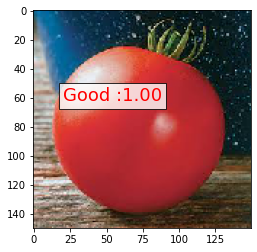

In [21]:
#Prediction of Single image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('Good_vs_Rotten/tomatoes_data/test/good/images (5).jpg',target_size=(150,150))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='rotten :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Good :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [22]:
#Prediction of Single image

img_pre=image.load_img('Good_vs_Rotten/tomatoes_data/test/rotten/images (2).jpg',target_size=(150,150))
img_pre=image.img_to_array(img_pre)
img_pre=np.expand_dims(img_pre,axis=0)
result=model.predict(img_pre)
if result[0][0]==0:
    print("Good")
else :
    print("rotten")

rotten
